In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.display import Image

# MSBA 6330 Homework 5 - Cloud Computing AWS - Danny Moncada

# Part A. Short Answer

1. Study five AWS services that are of interest to you. In a few sentences, explain what they are and what are their uses cases (cite sources if any).

#### __Amazon Machine Learning__ [Amazon Web Services, 2018, pg. 22-23]

ML allows data analysts/scientists to use predictive analytics and machine-learning technology with very little pre-work involved.  It provides visualization tools and wizards to create Machine Learning models without the need to learn complex algorithms and the technology behind the development of the models.  Analysts can make predictions for whatever their particular use case is without having to create custom code (that generates the actual predictions) or manage any infrastructure.  Analysts can create ML models with data stored in Amazon S3, Redshift, or RDS.

Use cases:
* *Flag suspicious transactions*: Create a model that will predict whether a customer's spending behavior is legitimate or fraudulent.
* *Forecast product demand*: Parse through historical order information and predict future order quantities.
* *Personalize application content*: Predict what products/services a user will be most interested in while browsing a site, and retrieve these predictions in real time.
* *Predict user activity*: Analyze user web trends to deliver a customized/improved user experience for a website
* *Listen to social media*: Analyze social media feeds and determine if products are being affected positively/negatively by user commentary



#### __Amazon QuickSight__ [Amazon Web Services, 2018, pg. 37-38]

Quicksight is a cloud based business analytics service that allows data analysts/scientists across an organization to build visualizations, perform ad-hoc analysis, and quickly gaining insights from data anytime on any device.  Analysts can connect to a variety of data sources, like flat files (CSV/Excel), onsight databases (SQL Server, MySQL), and AWS resources (Amazon RDS, Redshift, Athena, and S3).  Organizations can scale business analytics capabilities to hundreds of thousands (!) of users, and deliver very responsive query performance using a memory engine called __SPICE__ (Super-fast, Parallel, In-memory Calculate Engine).  Using a combination of columnar storage and in memory technology, interactive queries can be run on large datasets to get rapid response time, allowing analysts to derive insights from analysis without having to manage infrastructure.

Use cases:
* *Quick interactive ad-hoc exploration and optimized data visualization*
* *Create/share dashboards/KPI's to provide insight into data*
* *Guided tours through specific views of an analysis and share insights/collaborate with other analysts*
* *Analyze/visualize data coming from logs and stored in S3, SQL Server, Oracle, Amazon RDS, Redshift, etc.*

#### __Amazon EMR__ [Amazon Web Services, 2018, pg. 14-15]

EMR stands for Elastic Map Reduce, a highly distributed computing framework that provides data analysts/scientists the ability to process and store data quickly and cost-effectively.  EMR uses Apache Hadoop to distribute data and processing across clusters of EC2 (Elastic Compute Cloud) instances, and provides many of the same tools available to Hadoop users, including Hive, Pig, Spark, Scala, etc.  Amazon EMR handles provisioning, managing, and maintaining infrastructure/software of a Hadoop cluster.

Use cases:
* *Log processing and analytics*
* *Large ETL data movement*
* *Risk modeling and threat analytics*
* *Ad targeting and click stream analytics*
* *Genomics*
* *Predictive Analytics*
* *Ad hoc data mining and analytics*

#### __Amazon Redshift__ [Amazon Web Services, 2018, pg. 29-30]

Redshift is a fast, fully-managed, petabyte-scale data warehouse that simplifies analyzing data efficiently using existing Business Intelligence (BI) tools.  Analysts can analyze data sets ranging from a few gigabytes in size to a petabyte or more, and is designed to cost less than a tenth(!) of the cost of other traditional data warehousing implementations.  Similar to Quicksight, it uses columnar storage and distribution of queries across multiple nodes to deliver superior query performance.  Redshift handles a lot of common administrative tasks, making it possible for data analysts/scientists to build petabyte-scale data warehouses in minutes instead of weeks or months like traditional datawahouse implementations.

Use cases:

* *Analyze global sales data for multiple products*
* *Store historical stock trade data*
* *Analyze ad impressions and clicks*
* *Aggregate gaming data*
* *Analyze social media trends*
* *Measure operational efficiency and financial performance in a variety of industries*

#### __Amazon Kinesis__ [Amazon Web Services, 2018, pg. 7-8]

Kinesis is a platform that is used to stream data on AWS; data analysts/scientists can load and analyze streaming data as it comes in.  It's a very useful tool for ingesting large amounts of real-time data like application logs and website clicks.  Kinesis is especially powerful because an analyst can process and analyze the data as it arrives and respond to it in real-time, instead of having to wait until all data has been collected before processing it.

Use cases:

1.  *Real-time data analytics*: An analyst can monitor web traffic to help better plan allocation of resources during busy periods/high traffic.
2.  *Log / data feed intake & processing*: Use KDS to submit system and application logs and access the streams to process that information within seconds; this prevents the loss of log data if there is a failure on the front end/application server, and removes the need to store the log data in local storage. 
3.  *Real-time metrics / reporting*: KDS allows analysts to use data being ingested to extract metrics and generate KPIs to power reports/dashboards at near real-time speeds.  Analysts can apply data processing logic to work on data as it streams in, eliminating the need to wait for data batches to arrive.

#### [1] (2018).  *Big Data Analytics Options on AWS* [White paper].  Retreived July 28, 2019, from Amazon Web Services: https://d1.awsstatic.com/whitepapers/Big_Data_Analytics_Options_on_AWS.pdf

# Part II. Hands On

2. Upload the data files to your s3 Bucket. Report the locations of your files.

In [ ]:
## I placed them in s3://msba6330-monca/lastfm-csv/, photo below

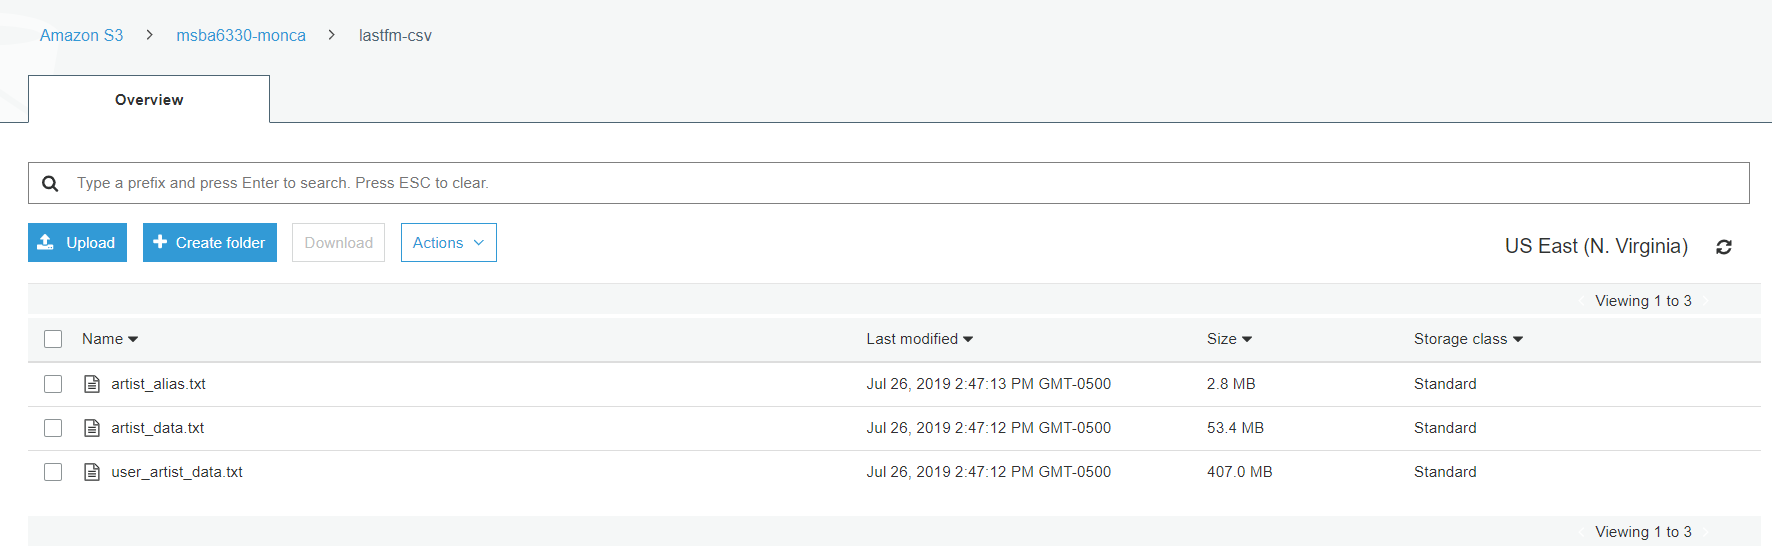

In [10]:
PATH = "C:/Users/monca016/Documents/Masters - Business Analytics/Summer 2019/MSBA 6330 - Big Data Analytics/lastfm_2005"
Image(filename = PATH + "/lastfm_datafiles_location.jpg", width=1300, height=1300)

3. Create a EMR cluster with Hive + Hue enabled. Report your cluster configuration, including EMR/hadoop/Hive version, hardware configuration.

In [ ]:
## EMR Version: 5.25.0
## Hadoop Version: Amazon 2.8.5
## Hive Version: 2.3.5 
## Hardware config: 
            1 MASTER node, 15 GiB Memory, 80 SSD GB storage
            2 CORE nodes, 15 GiB Memory, 80 SSD GB storage
        
## picture below

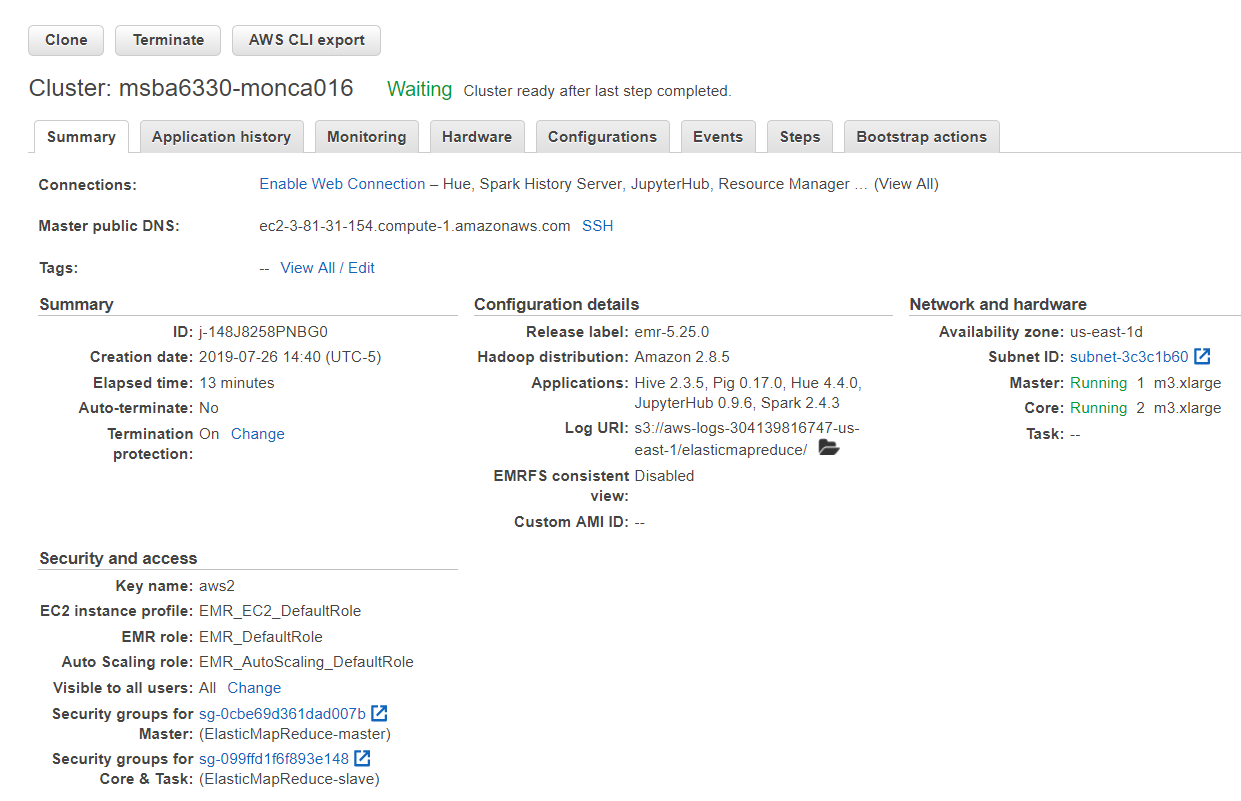

In [15]:
PATH = "C:/Users/monca016/Documents/Masters - Business Analytics/Summer 2019/MSBA 6330 - Big Data Analytics/lastfm_2005"
Image(filename = PATH + "/aws_cluster_info.jpg", width=850, height=850)

4. Create an external hive table user_artist_data based on the user_artist_data on S3. Report your HiveQL command.

In [ ]:
CREATE DATABASE lastfm;

USE lastfm;

CREATE EXTERNAL TABLE user_artist_data (USERID INT, ARTISTID INT, 
                                        PLAYCOUNT SMALLINT) 
ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ' ' 
LINES TERMINATED BY '\n' 
STORED AS TEXTFILE;

LOAD DATA INPATH 's3://msba6330-monca/lastfm-csv/user_artist_data.txt' INTO TABLE user_artist_data;

5. Create an external Hive table artist_alias based on the artist_alias folder (and its content) on S3. Report your HiveQL command.

In [ ]:
CREATE EXTERNAL TABLE artist_alias (BADID INT, GOODID INT) 
ROW FORMAT DELIMITED 
FIELDS TERMINATED BY '\t' 
LINES TERMINATED BY '\n' 
STORED AS TEXTFILE;

LOAD DATA INPATH 's3://msba6330-monca/lastfm-csv/artist_alias.txt' INTO TABLE artist_alias;

6. create an external Hive table artist_data based on the artist_data folder (and its content) on S3. Report your HiveQL command.

In [ ]:
CREATE EXTERNAL TABLE artist_data (ARTISTID INT, ARTISTNAME STRING) 
ROW FORMAT DELIMITED
FIELDS TERMINATED BY '\t' 
LINES TERMINATED BY '\n' 
STORED AS TEXTFILE;

LOAD DATA INPATH 's3://msba6330-monca/lastfm-csv/artist_data.txt' INTO TABLE artist_data;

7. Find out how many records are in the user_artist_data table. __Report the result.__

In [ ]:
SELECT COUNT(USERID) FROM user_artist_data;

## There are 24,296,858 rows in the user_artist_data table.

8. As you find out through readme.txt, the table artist_alias contains information on incorrectly spelled artist ids and the correct artist ids. Fix the incorrect artist IDs in the user_artist_data table and save the results as user_artist_data_fixed -- this would be a new comma-delimited hive table user_artist_data_fixed (fields:userid, artistid, playcount) on S3.

*Hint*: You need to keep good ids and replace bad ones. The logic should be that if an artistid in the user_artist_data table has no hit in the artist_alias's list of badids, it is a good id and should be kept as is; otherwise, it should be replaced with the artistid in artist_alias. Hive's if function can come in handy for this case, and also you should think about how to join tables.

In [ ]:
CREATE TABLE user_artist_data_fixed (USERID INT, ARTISTID INT, PLAYCOUNT SMALLINT) 
ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ',' 
LINES TERMINATED BY '\n' 
STORED AS TEXTFILE
LOCATION 's3://msba6330-monca/lastfm-csv/user_artist_data_fixed';

INSERT OVERWRITE TABLE user_artist_data_fixed SELECT U.USERID AS USERID, 
CASE WHEN AA.BADID IS NULL THEN U.ARTISTID ELSE AA.GOODID END AS ARTISTID, 
U.PLAYCOUNT AS PLAYCOUNT 
FROM user_artist_data U LEFT OUTER JOIN artist_alias AA 
ON U.artistid = AA.badid;

9. Compute the top 20 most popular artists by total playcount, and store results as a CSV file (fields: artistid, artist_name, playcount) on S3.  __Report the content of the CSV file__

In [ ]:
CREATE EXTERNAL TABLE csvexport (ARISTID INT, ARTIST_NAME STRING, PLAYCOUNT INT) 
ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ',' 
LINES TERMINATED BY '\n' 
STORED AS TEXTFILE
LOCATION 's3://msba6330-monca/lastfm-csv/csv_file';

INSERT OVERWRITE TABLE csvexport
SELECT U.ARTISTID AS ARTISTID, AD.ARTISTNAME AS ARTIST_NAME, SUM(U.PLAYCOUNT) AS PLAYCOUNT 
FROM user_artist_data_fixed U JOIN artist_data AD 
ON U.ARTISTID = AD.ARTISTID 
GROUP BY U.ARTISTID, AD.ARTISTNAME 
ORDER BY PLAYCOUNT DESC 
LIMIT 20;

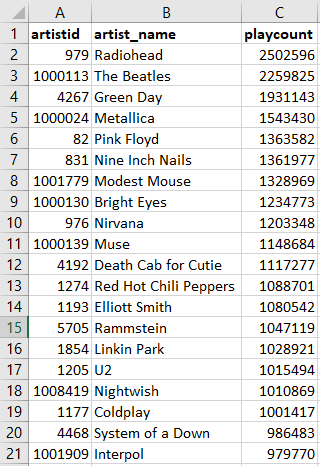

In [6]:
PATH = "C:/Users/monca016/Documents/Masters - Business Analytics/Summer 2019/MSBA 6330 - Big Data Analytics/lastfm_2005"
Image(filename = PATH + "/lastfm_output.jpg", width=250, height=250)

10. clean up by deleting the s3 folders and data files created for this task. (No reporting of commands/results required)

In [ ]:
## All s3 folders / data files were deleted.

__11. Be sure shut down the cluster when your are done and double check whether you still have anything running! Or you will be charged!__

In [ ]:
## EMR cluster was shut down, ended up being about $3.